## Data Set Overview

### Load Packages

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# custom plot
from sbcustom import *

### Set Options

In [2]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 6

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

Read Dataset

In [3]:
bikeshare = pd.read_csv('train.csv', parse_dates=["datetime"])

Shape of the Data

In [4]:
print('Shape of data: ', bikeshare.shape)

Shape of data:  (10886, 12)


Few Observations

In [5]:
bikeshare.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


Feature Data Types

In [6]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Feature Statistics Summary

In [7]:
bikeshare.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
...,...,...,...,...,...,...,...,...,...,...,...
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.45,100.00,57.00,367.00,886.00,977.00


## EDA

Converting into categorical data

In [8]:
category_list = ['season', 'holiday', 'workingday', 'weather']

Mapping numbers to categorical data

In [9]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_dict = {1: 'Clear', 2: 'Misty+Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}
bikeshare['season'] = bikeshare['season'].map(season_dict)
bikeshare['weather'] = bikeshare['weather'].map(weather_dict)
bikeshare

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,5,27,32
...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.91,61,15.00,4,164,168
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.43,61,6.00,12,117,129
10885,2012-12-19 23:00:00,Winter,0,1,Clear,13.12,16.66,66,9.00,4,84,88


To Categorical type

In [10]:
bikeshare['season'] = pd.Categorical(
    bikeshare['season'],
    categories=['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)

bikeshare['weather'] = pd.Categorical(
    bikeshare['weather'],
    categories=['Clear', 'Misty+Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain'],
    ordered = True
)

bikeshare['workingday'] = pd.Categorical(
    bikeshare['workingday'],
    categories=[0, 1],
    ordered = True
)

bikeshare['holiday'] = pd.Categorical(
    bikeshare['holiday'],
    categories=[0, 1],
    ordered = True
)

Distribution with Weather, Season, WorkingDay, Holiday

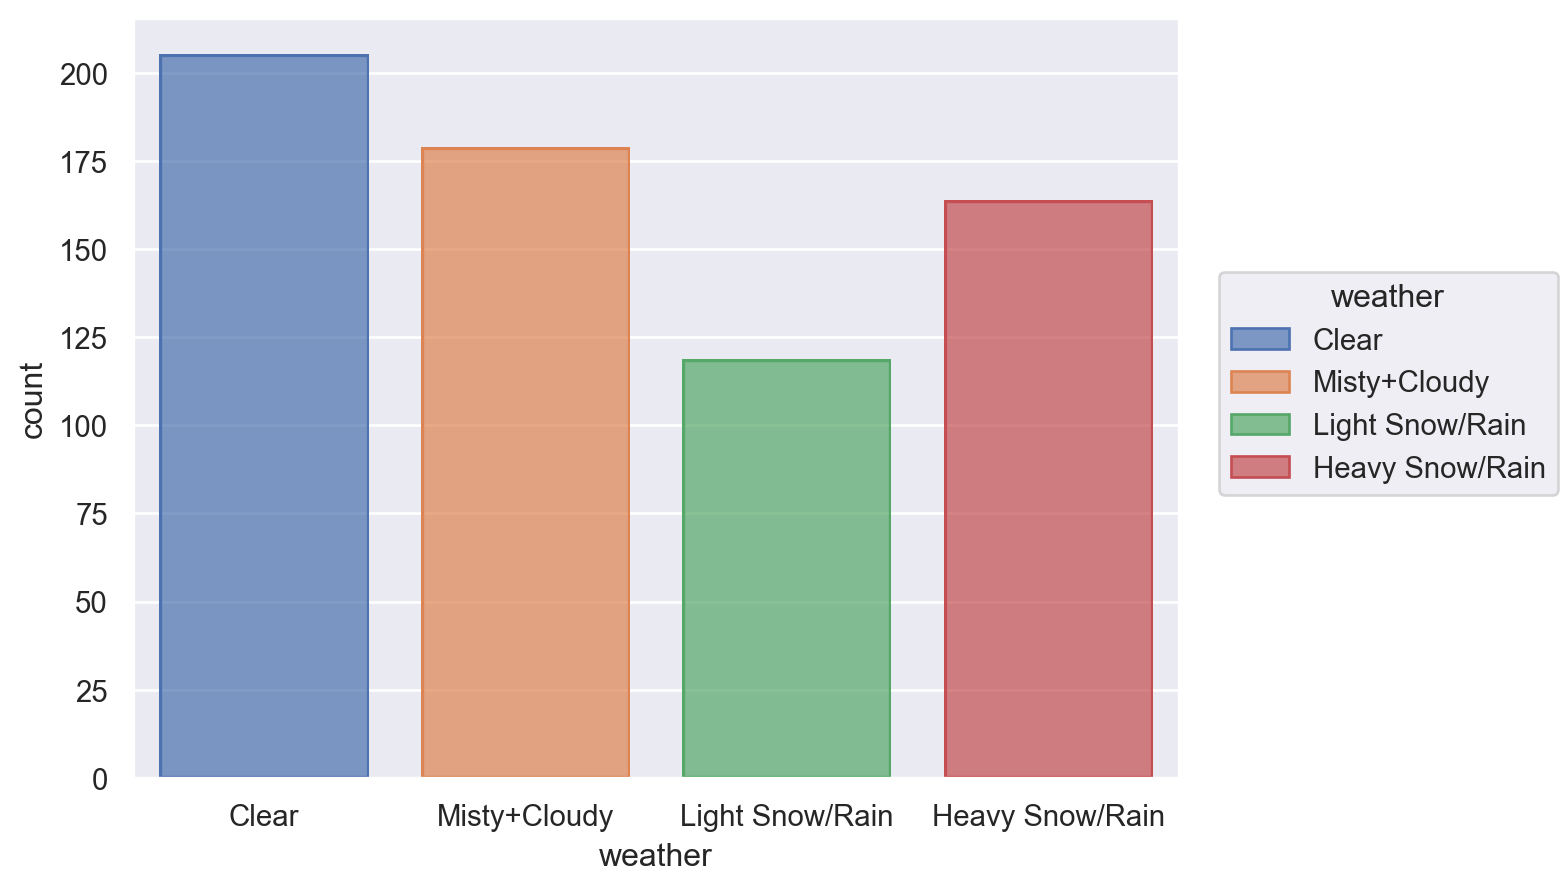

In [11]:
group_weather = bikeshare.groupby('weather')['count'].mean().reset_index()
(
    so.Plot(group_weather, x='weather', y='count')
    .add(so.Bar(), color = 'weather')
)

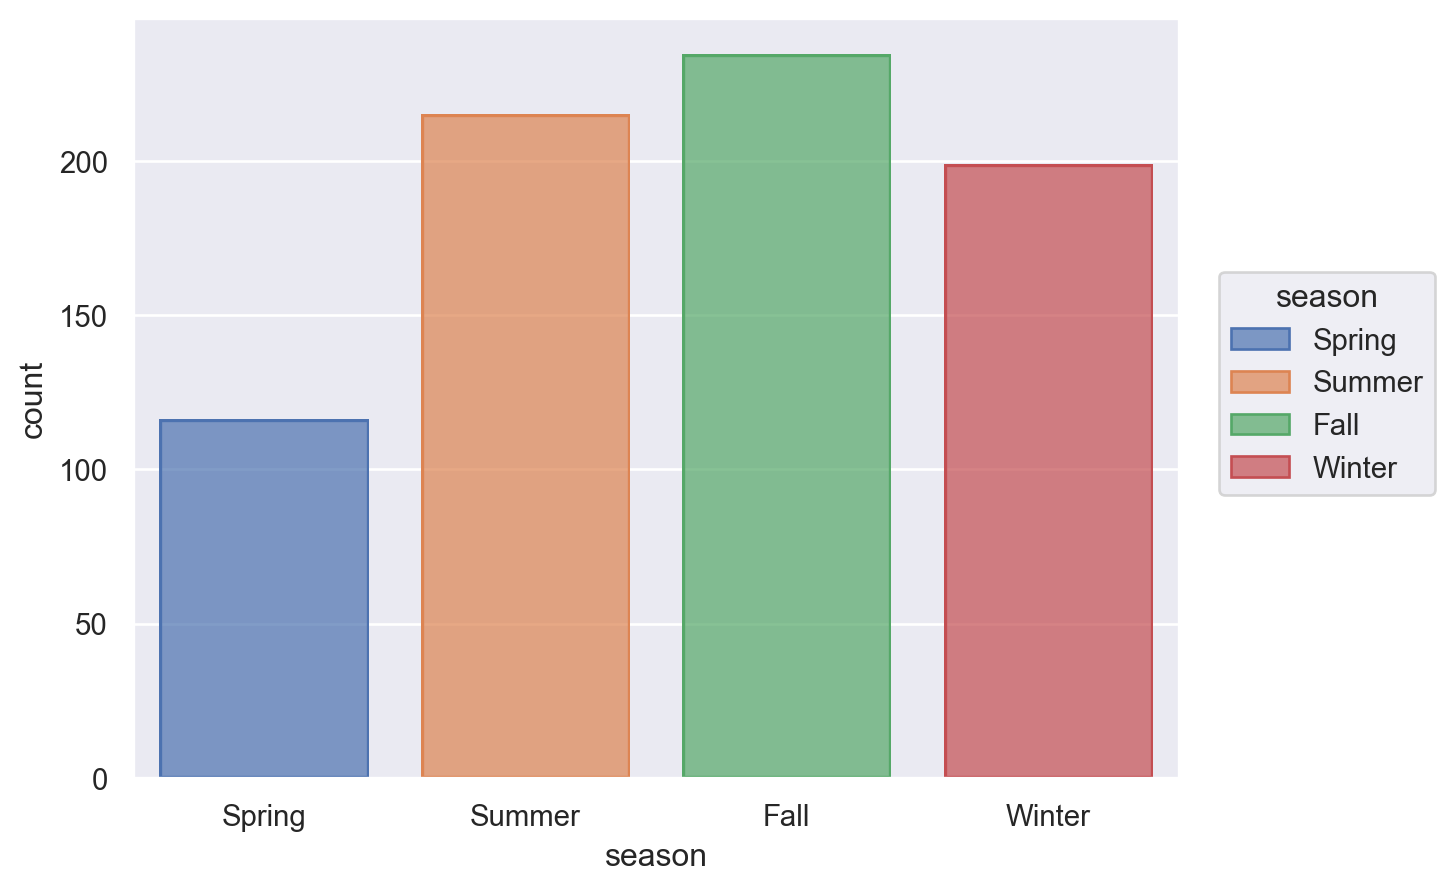

In [12]:
group_season = bikeshare.groupby('season')['count'].mean().reset_index()
(
    so.Plot(group_season, x='season', y='count')
    .add(so.Bar(), color = 'season')
)

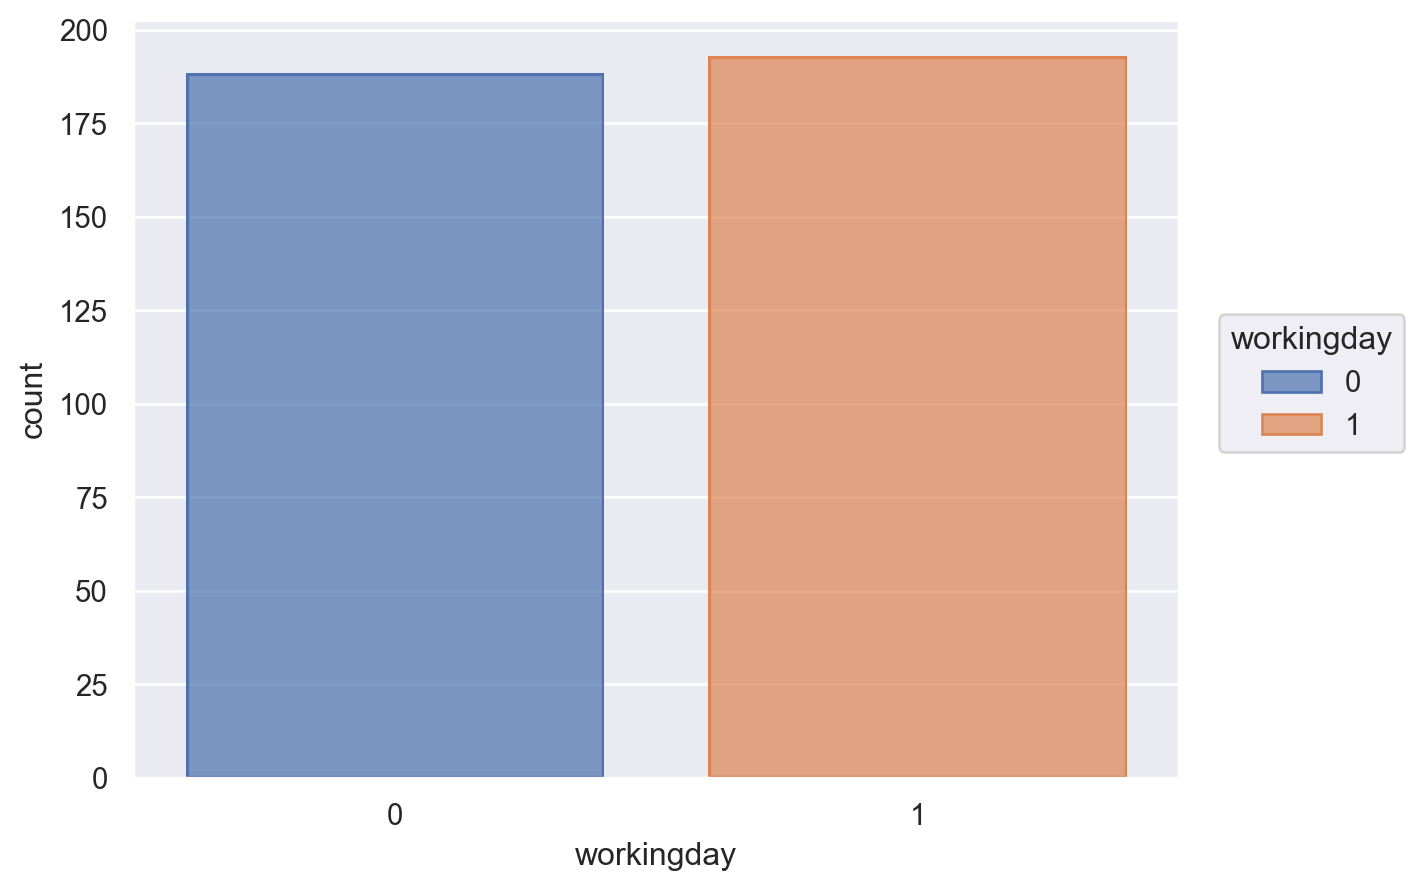

In [13]:
group_workingday = bikeshare.groupby('workingday')['count'].mean().reset_index()
(
    so.Plot(group_workingday, x='workingday', y='count')
    .add(so.Bar(), color='workingday')
)

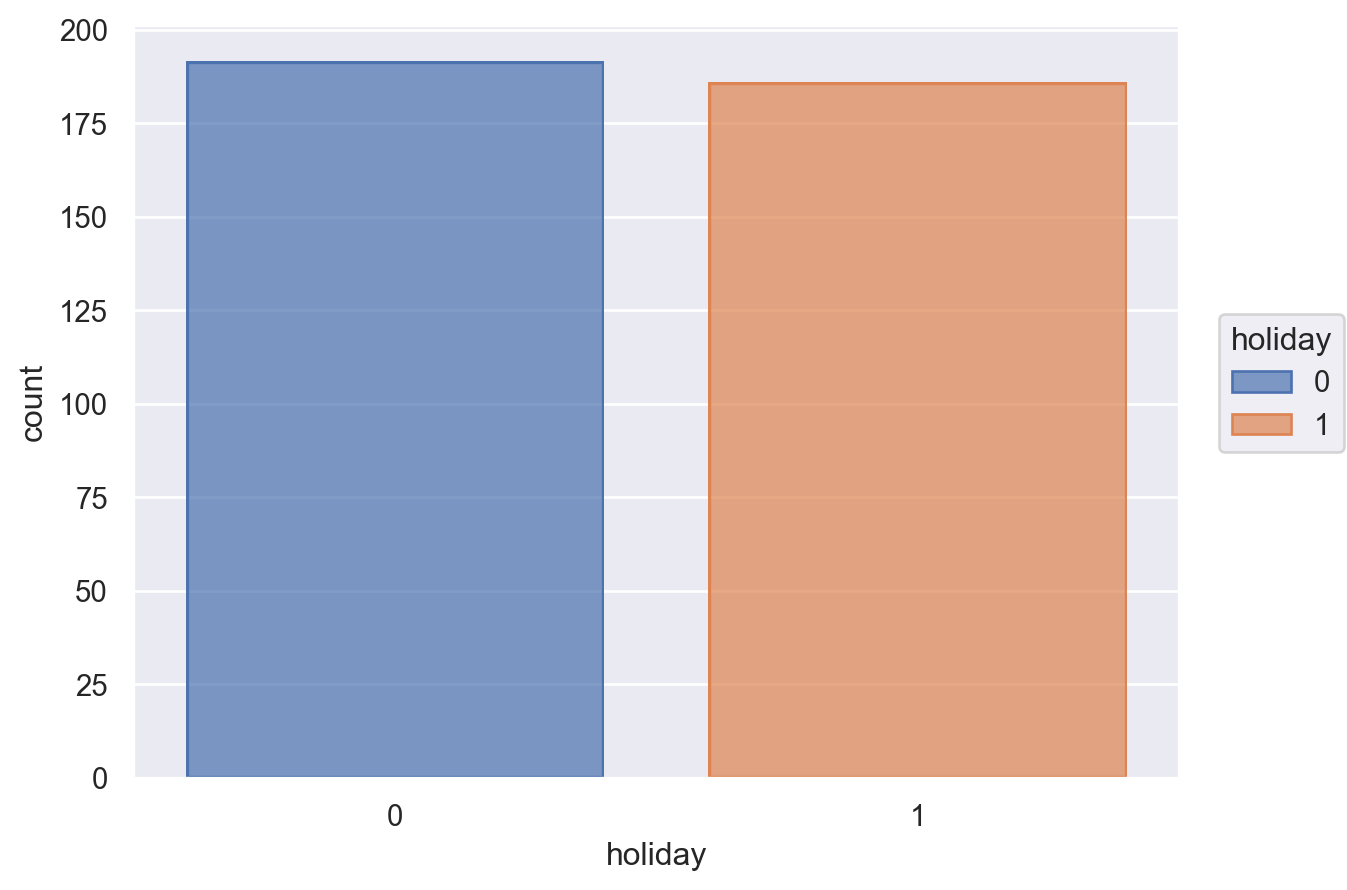

In [14]:
group_holiday = bikeshare.groupby('holiday')['count'].mean().reset_index()
(
    so.Plot(group_holiday, x='holiday', y='count')
    .add(so.Bar(), color =  'holiday')
)

<Axes: title={'center': 'count'}, xlabel='weather'>

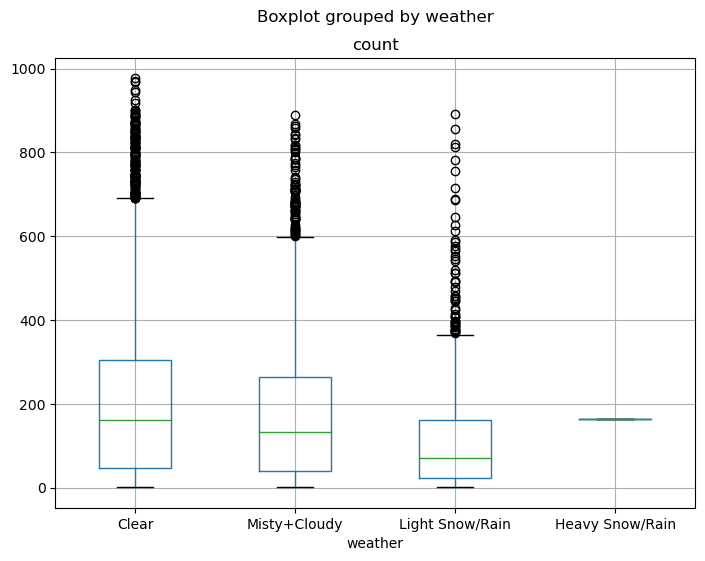

In [15]:
bikeshare.boxplot(column='count', by='weather', figsize=(8, 6))

<Axes: title={'center': 'count'}, xlabel='season'>

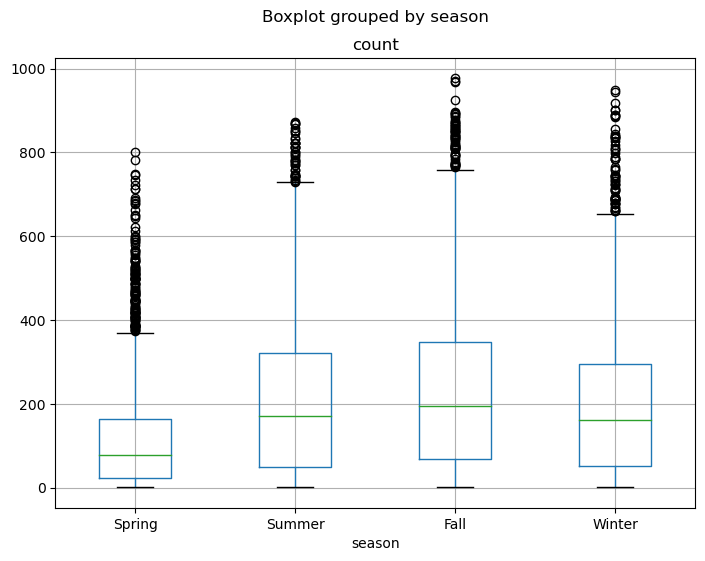

In [16]:
bikeshare.boxplot(column='count', by='season', figsize=(8, 6))

<Axes: title={'center': 'count'}, xlabel='workingday'>

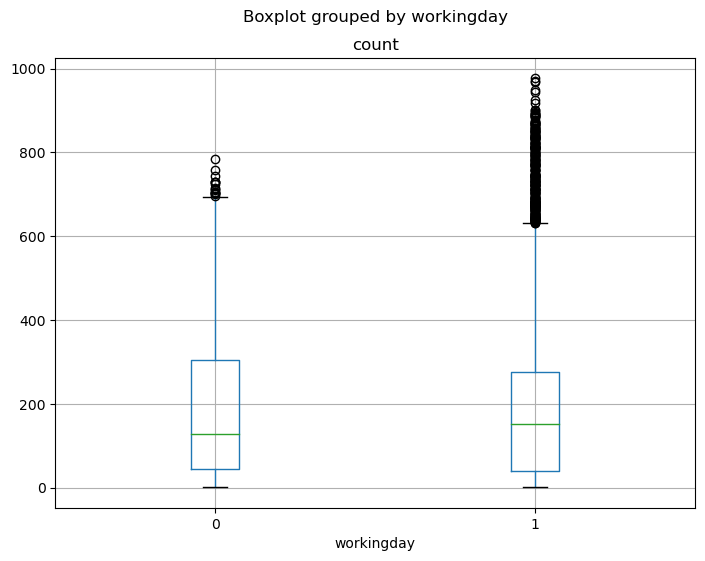

In [17]:
bikeshare.boxplot(column='count', by='workingday', figsize=(8, 6))

<Axes: title={'center': 'count'}, xlabel='holiday'>

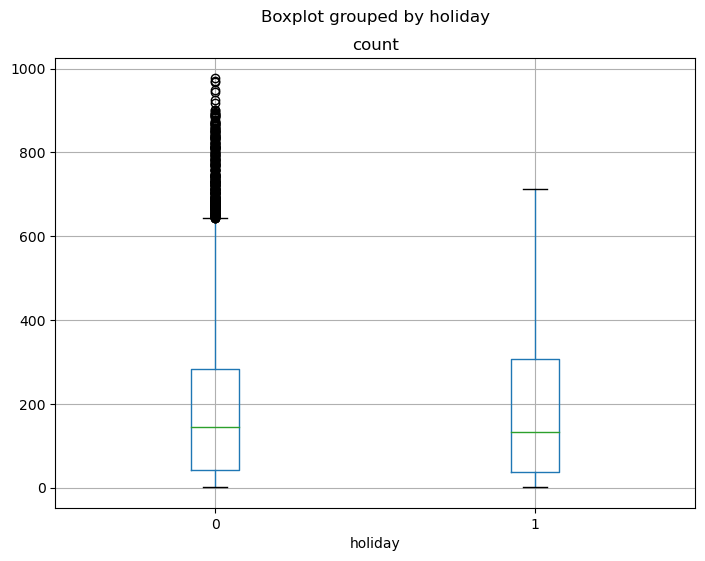

In [18]:
bikeshare.boxplot(column='count', by='holiday', figsize=(8, 6))

In [19]:
bikeshare["year"] = bikeshare["datetime"].dt.year
bikeshare["date"] = bikeshare["datetime"].dt.date
bikeshare["day"] = bikeshare["datetime"].dt.day_of_year
bikeshare["weekday"] = bikeshare["datetime"].dt.weekday
bikeshare["time"] = bikeshare["datetime"].dt.hour

In [20]:
day_dict = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
bikeshare['weekday'] = bikeshare['weekday'].map(day_dict)

In [21]:
bikeshare

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,date,day,weekday,time
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.39,81,0.00,3,13,16,2011,2011-01-01,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,8,32,40,2011,2011-01-01,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.63,80,0.00,5,27,32,2011,2011-01-01,1,Saturday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.91,61,15.00,4,164,168,2012,2012-12-19,354,Wednesday,21
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.43,61,6.00,12,117,129,2012,2012-12-19,354,Wednesday,22
10885,2012-12-19 23:00:00,Winter,0,1,Clear,13.12,16.66,66,9.00,4,84,88,2012,2012-12-19,354,Wednesday,23


In [22]:
bikeshare["year"] = pd.Categorical(
    bikeshare["year"],
    categories=[2011, 2012],
    ordered = True
)

bikeshare["time"] = pd.Categorical(
    bikeshare["time"],
    categories=[x for x in range(24)],
    ordered = True
)

bikeshare["weekday"] = pd.Categorical(
    bikeshare["weekday"],
    categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    ordered = True
)

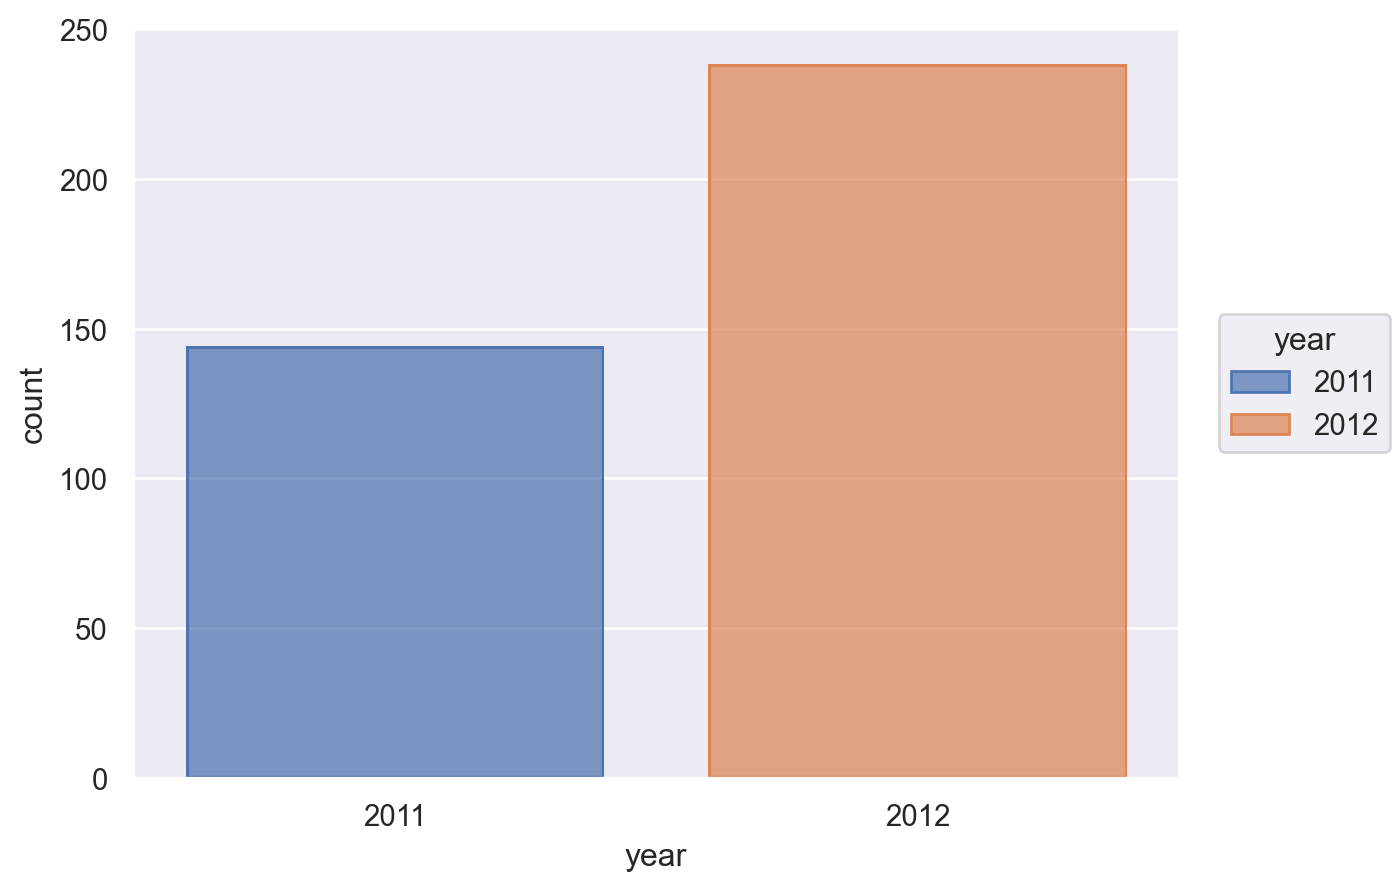

In [23]:
group_year = bikeshare.groupby('year')['count'].mean().reset_index()
(
    so.Plot(group_year, x='year', y='count')
    .add(so.Bar(), color='year')
)

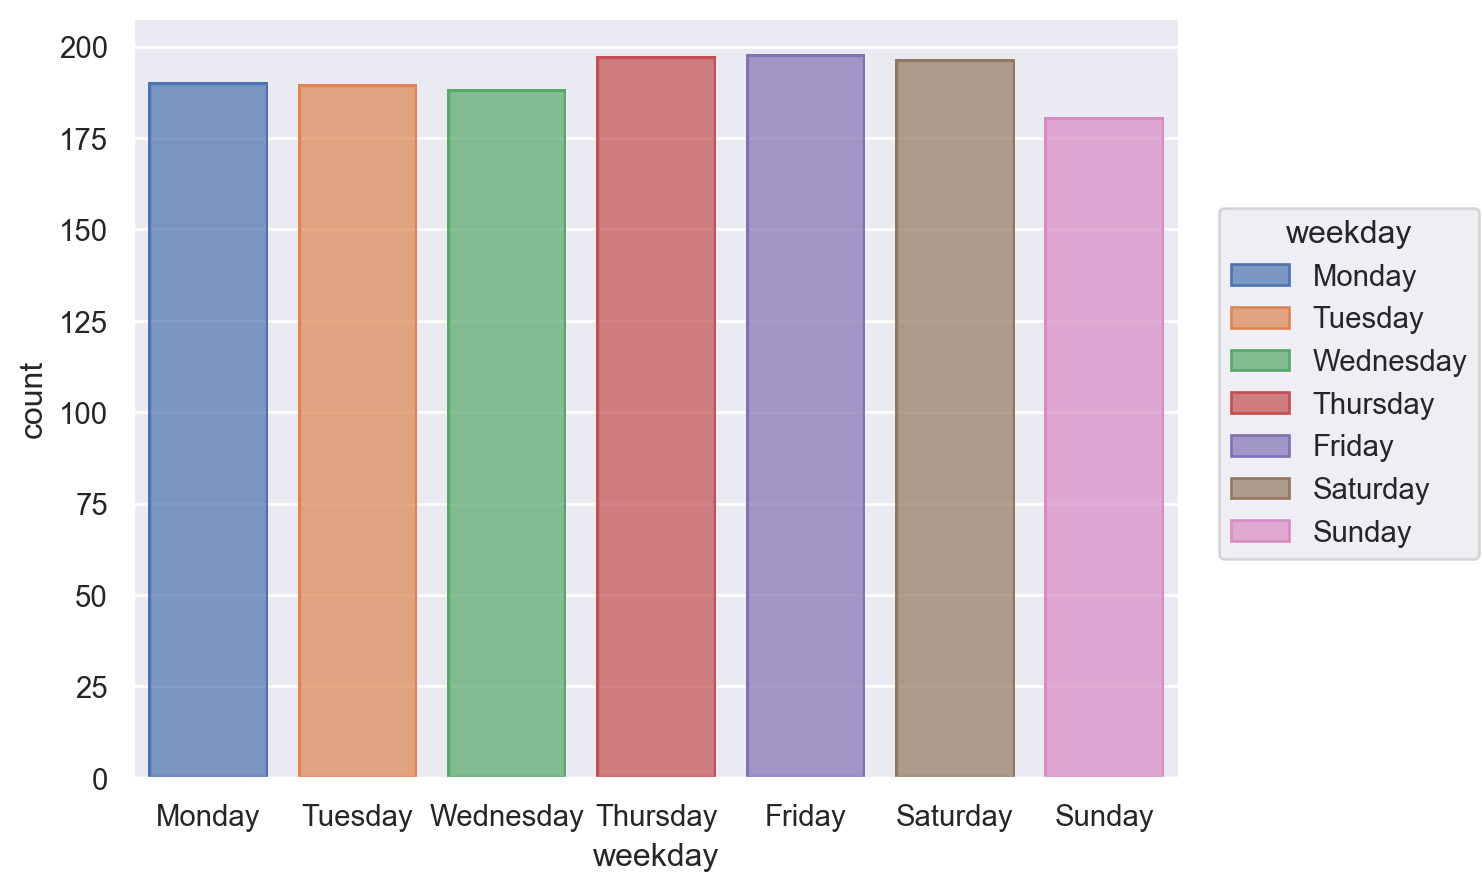

In [24]:
group_weekday = bikeshare.groupby('weekday')['count'].mean().reset_index()
(
    so.Plot(group_weekday, x='weekday', y='count')
    .add(so.Bar(), color='weekday')
)

<Axes: title={'center': 'count'}, xlabel='time'>

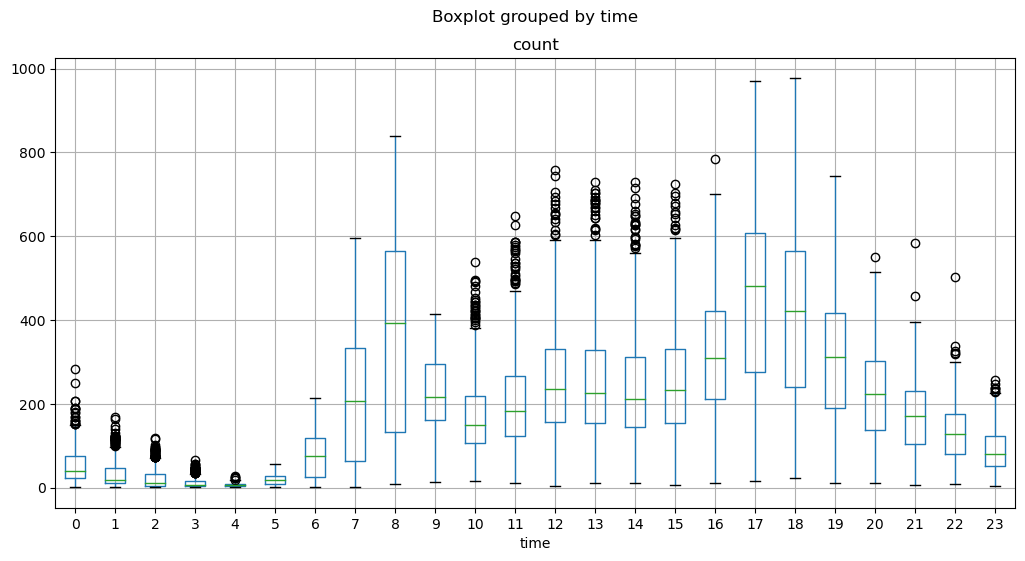

In [25]:
bikeshare.boxplot(column='count', by='time', figsize=(12, 6))

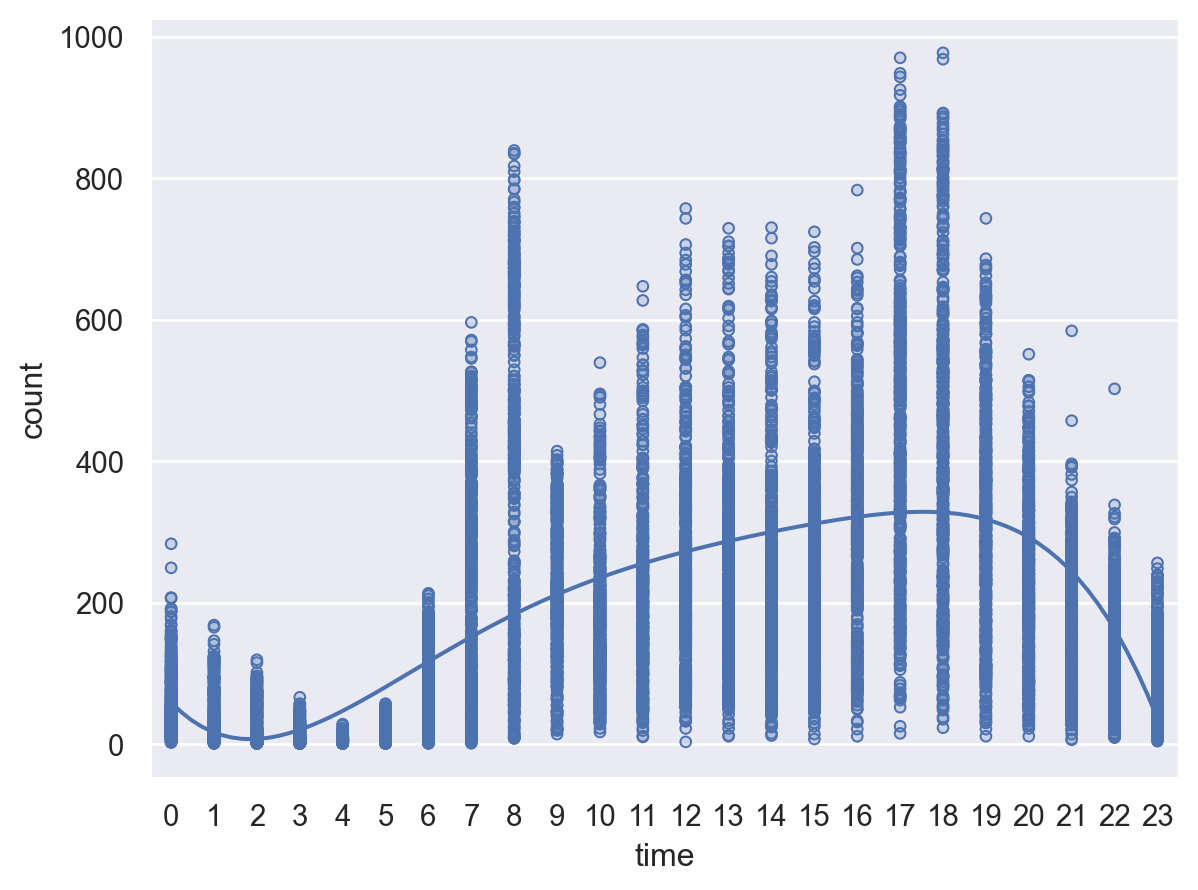

In [26]:
(
    so.Plot(bikeshare, x='time', y='count')
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(5))
)

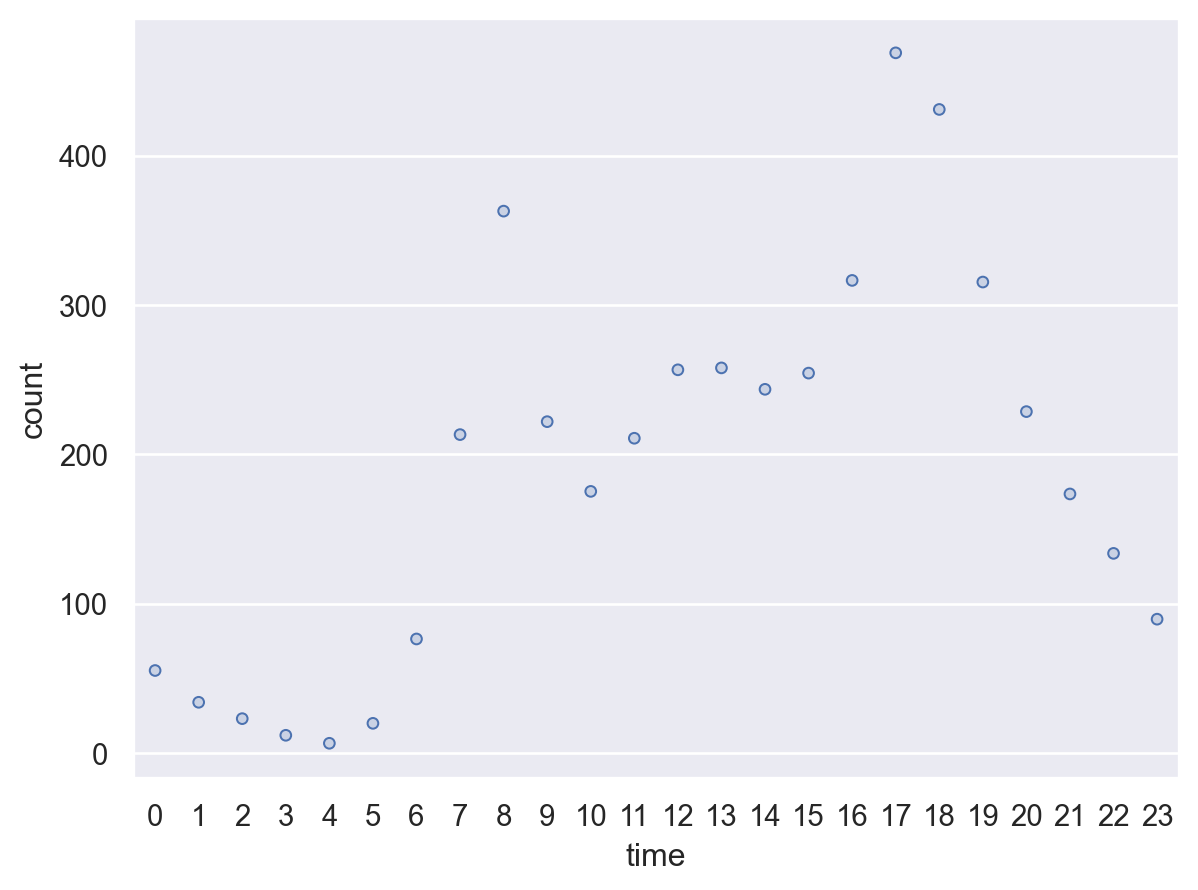

In [27]:
group_hour = bikeshare.groupby('time')['count'].mean().reset_index()
(
    so.Plot(group_hour, x='time', y='count')
    .add(so.Dots())
)

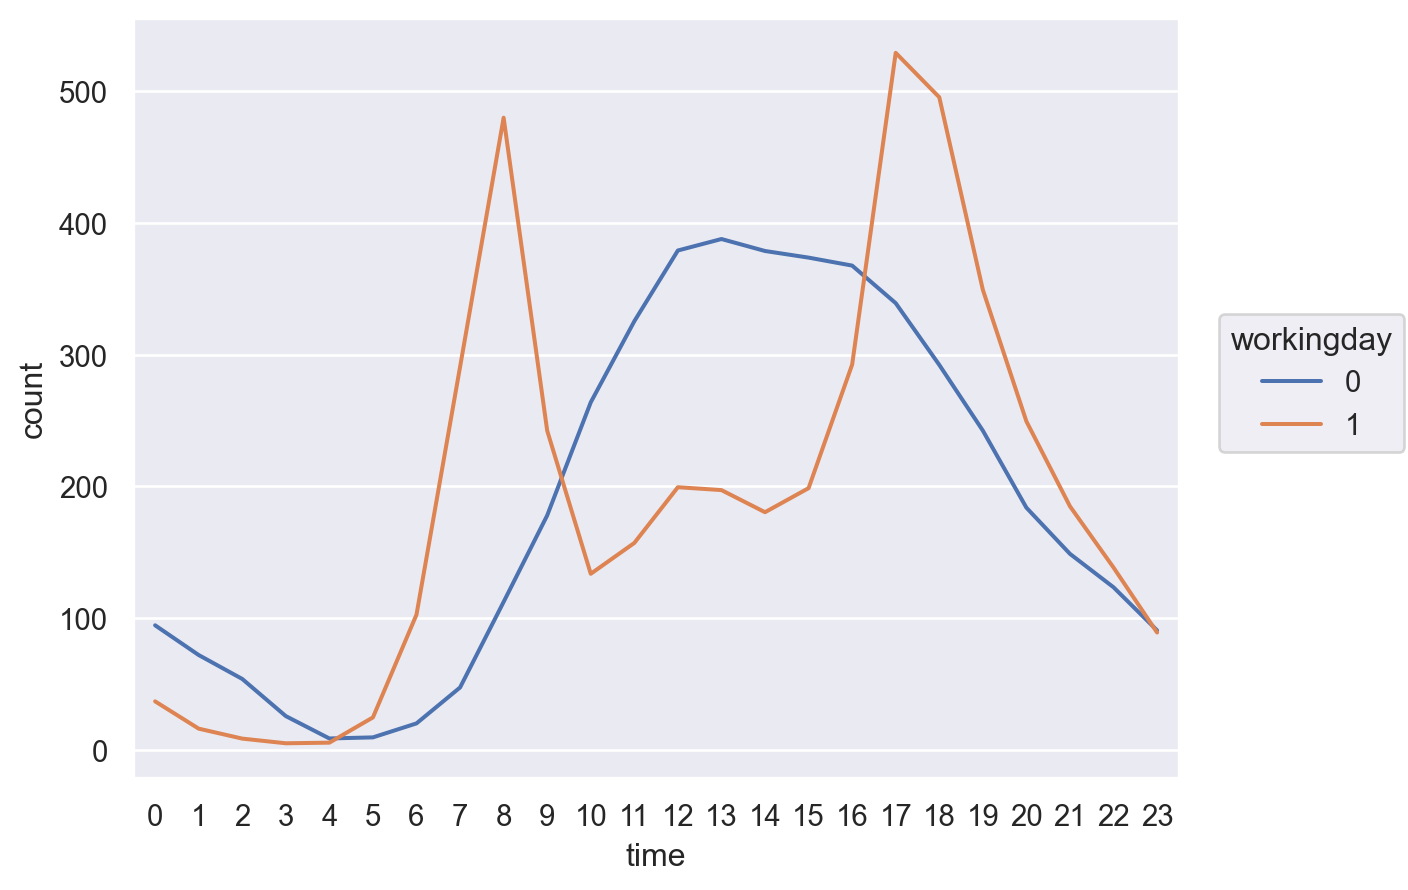

In [28]:
group_work_hour = bikeshare.groupby(['workingday', 'time'])['count'].mean().reset_index()
(
    so.Plot(group_work_hour, x='time', y='count')
    .add(so.Line(), color='workingday')
)

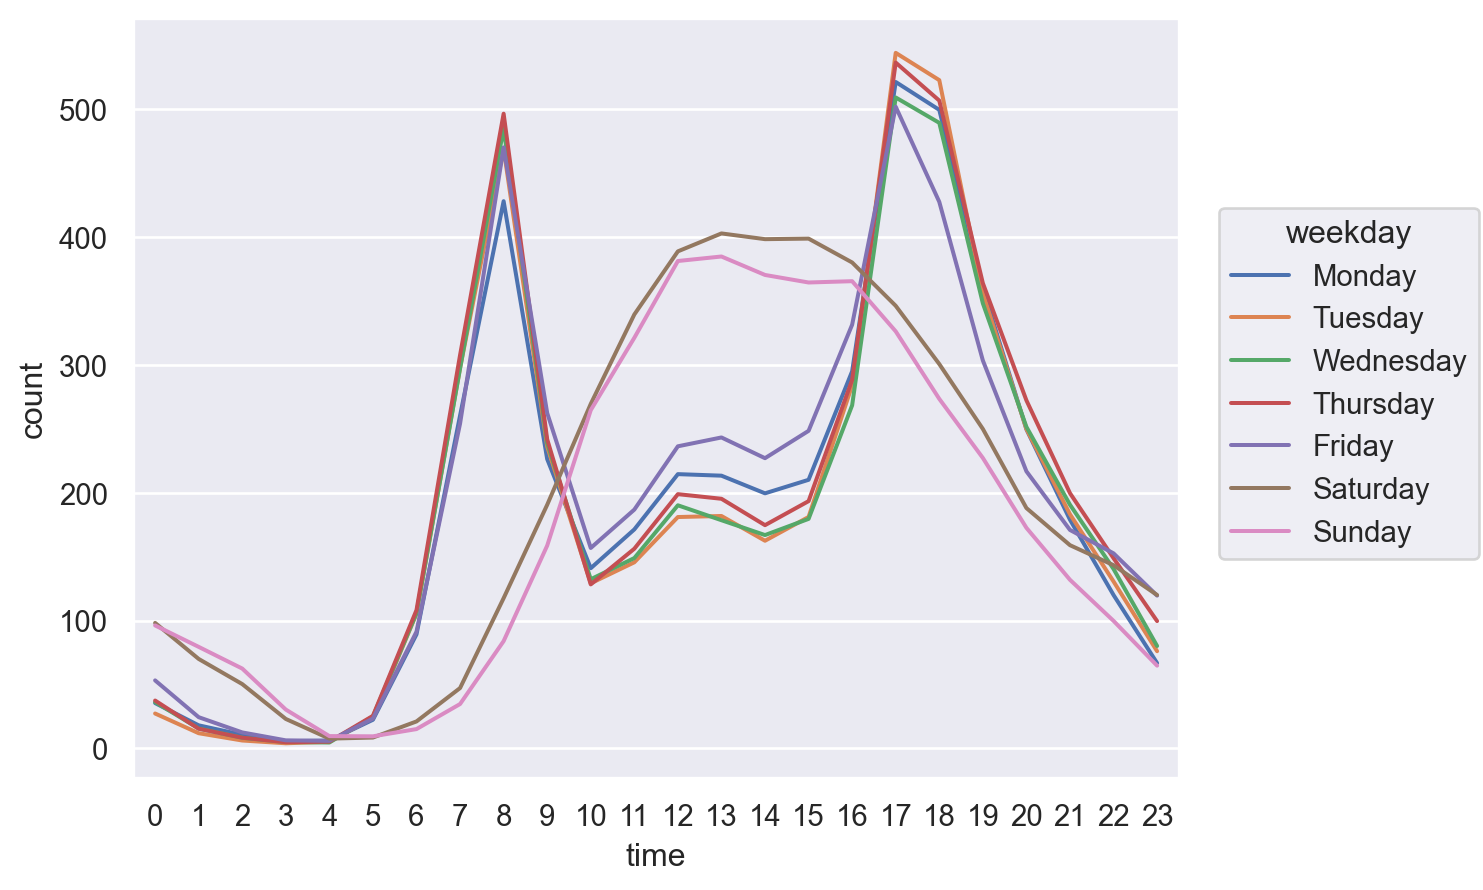

In [29]:
group_work_hour = bikeshare.groupby(['weekday', 'time'])['count'].mean().reset_index()
(
    so.Plot(group_work_hour, x='time', y='count')
    .add(so.Line(), color='weekday')
)

/var/folders/0t/hxdzsprx1rn_mxdx32s1x0s80000gn/T/ipykernel_44241/2993265898.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  bikeshare_melt = bikeshare.melt(id_vars='time', value_vars=['casual', 'registered'], value_name='count', var_name='casual_registered')


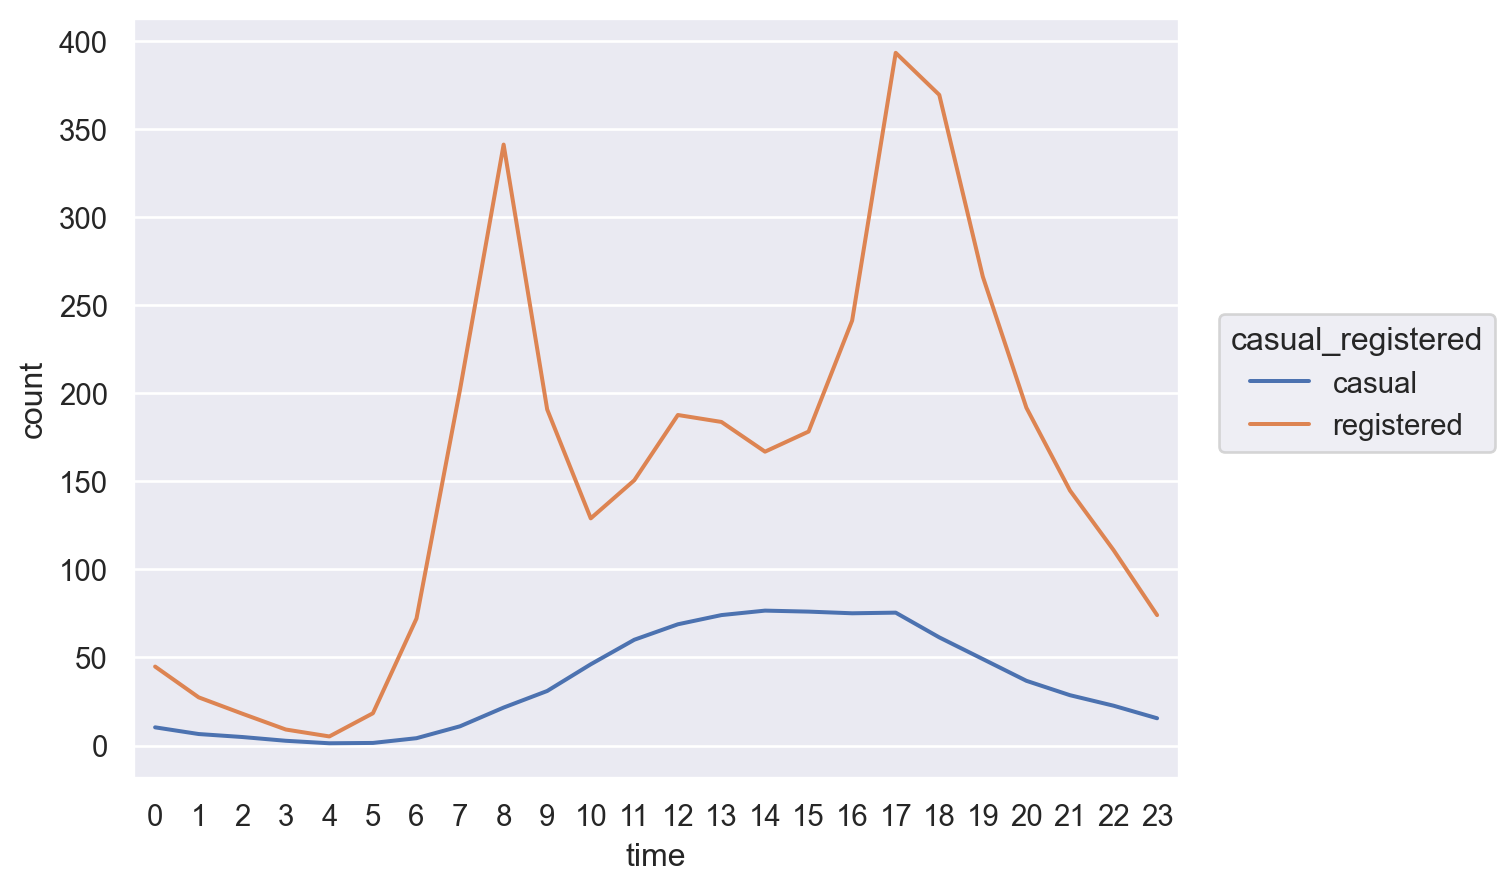

In [30]:
bikeshare_melt = bikeshare.melt(id_vars='time', value_vars=['casual', 'registered'], value_name='count', var_name='casual_registered')
group_casual_hour = bikeshare_melt.groupby(['time', 'casual_registered'])['count'].mean().reset_index()
(
    so.Plot(group_casual_hour, x='time', y='count')
    .add(so.Line(), color = 'casual_registered')
)